In [2]:
!pip install mlxtend

ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

scikit-learn 1.2.2 requires joblib>=1.1.1, but you'll have joblib 0.17.0 which is incompatible.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


In [38]:
!pip install squarify

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pandas as pd # data processing
import numpy as np # linear algebra
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data = pd.read_csv("Assignment-1_Data.csv",sep=";")

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


# Data Preprocessing

In [5]:
data.head(10)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,01.12.2010 08:26,"7,65",17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,01.12.2010 08:26,"4,25",17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,01.12.2010 08:28,"1,85",17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,01.12.2010 08:34,"1,69",13047.0,United Kingdom


In [6]:
data.dtypes

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo         object
Itemname       object
Quantity        int64
Date           object
Price          object
CustomerID    float64
Country        object
dtype: object

In [7]:
data.columns

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country'],
      dtype='object')

In [8]:
data.shape

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(522064, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data.describe()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


In [11]:
data.isnull().sum()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [12]:
data = data.dropna(subset=["Itemname"])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
data.isnull().sum()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132586
Country            0
dtype: int64

In [14]:
data["Itemname"].value_counts()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


WHITE HANGING HEART T-LIGHT HOLDER    2269
JUMBO BAG RED RETROSPOT               2087
REGENCY CAKESTAND 3 TIER              1930
PARTY BUNTING                         1677
LUNCH BAG RED RETROSPOT               1570
                                      ... 
wrongly sold as sets                     1
ORANGE FELT VASE + FLOWERS               1
wet?                                     1
SET 36 COLOURING PENCILS DOILEY          1
TEA TIME BREAKFAST BASKET                1
Name: Itemname, Length: 4185, dtype: int64

In [15]:
data[data['CustomerID'].isnull()]

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
1410,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,01.12.2010 14:32,"2,51",NaN,United Kingdom
1411,536544,DECORATIVE CATS BATHROOM BOTTLE,2,01.12.2010 14:32,"2,51",NaN,United Kingdom
1412,536544,POLKADOT RAIN HAT,4,01.12.2010 14:32,"0,85",NaN,United Kingdom
1413,536544,RAIN PONCHO RETROSPOT,2,01.12.2010 14:32,"1,66",NaN,United Kingdom
1414,536544,VINTAGE SNAP CARDS,9,01.12.2010 14:32,"1,66",NaN,United Kingdom
...,...,...,...,...,...,...,...
521695,581498,JUMBO BAG RED RETROSPOT,5,09.12.2011 10:26,"4,13",NaN,United Kingdom
521696,581498,JUMBO BAG BAROQUE BLACK WHITE,4,09.12.2011 10:26,"4,13",NaN,United Kingdom
521697,581498,LADIES & GENTLEMEN METAL SIGN,1,09.12.2011 10:26,"4,96",NaN,United Kingdom
521698,581498,S/4 CACTI CANDLES,1,09.12.2011 10:26,"10,79",NaN,United Kingdom


In [16]:
data = data.fillna(0)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
data[data["CustomerID"].isnull()]

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


In [18]:
data.isnull().sum()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [19]:
data.shape

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(520609, 7)

In [20]:
data["Date"] = pd.to_datetime(data["Date"])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
data["Price"] = data["Price"].str.replace(",",".")
data["Price"] = pd.to_numeric(data["Price"])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
data["Price"]

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
522059    0.85
522060    2.10
522061    4.15
522062    4.15
522063    4.95
Name: Price, Length: 520609, dtype: float64

In [23]:
data.dtypes

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object

In [24]:
data["Sales"] = data["Quantity"] * data["Price"]

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
data.head()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
top20items = pd.DataFrame(data["Itemname"].value_counts().head(20))
top20items = top20items.reset_index()
top20items.columns = ["Itemname","Frequency"]
labels = top20items["Itemname"]
sizes = top20items["Frequency"]
top20items

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Itemname,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2269
1,JUMBO BAG RED RETROSPOT,2087
2,REGENCY CAKESTAND 3 TIER,1930
3,PARTY BUNTING,1677
4,LUNCH BAG RED RETROSPOT,1570
5,ASSORTED COLOUR BIRD ORNAMENT,1465
6,SET OF 3 CAKE TINS PANTRY DESIGN,1360
7,PACK OF 72 RETROSPOT CAKE CASES,1328
8,LUNCH BAG BLACK SKULL.,1315
9,NATURAL SLATE HEART CHALKBOARD,1246


C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Top 20 Products')

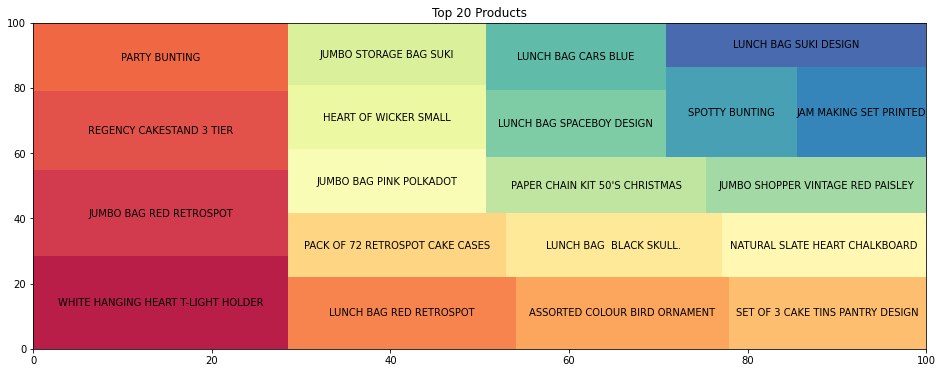

In [27]:
fig = plt.figure(figsize=(16,6))
colors = sns.color_palette("Spectral",20)
squarify.plot(sizes, label=labels, color =  colors)
plt.title("Top 20 Products")

In [28]:
t_light = data[data["Itemname"]== "WHITE HANGING HEART T-LIGHT HOLDER"]
t_light

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
49,536373,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:02:00,2.55,17850.0,United Kingdom,15.30
66,536375,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 09:32:00,2.55,17850.0,United Kingdom,15.30
218,536390,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-01-12 10:19:00,2.55,17511.0,United Kingdom,163.20
253,536394,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-01-12 10:39:00,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...
517571,581246,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-08-12 10:59:00,2.95,15453.0,United Kingdom,2.95
517606,581253,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-08-12 11:15:00,2.95,16891.0,United Kingdom,5.90
518122,581356,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-12 12:28:00,2.95,17830.0,United Kingdom,17.70
520160,581452,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-08-12 18:03:00,2.55,17675.0,United Kingdom,81.60


C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='Date', ylabel='Quantity'>

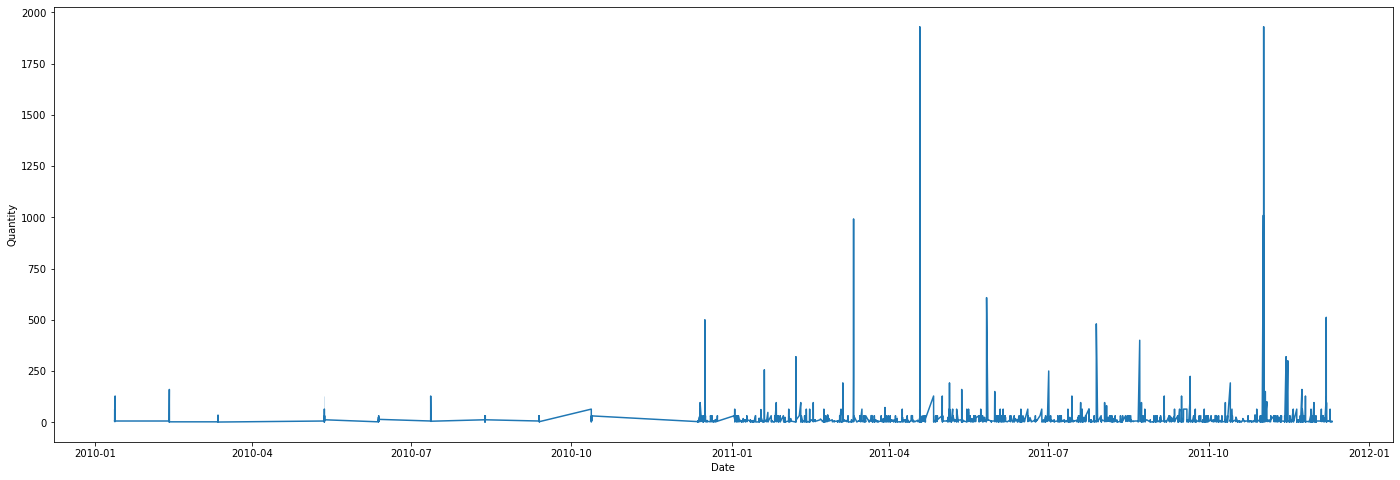

In [29]:
fig = plt.figure(figsize=(24,8))
sns.lineplot(x = t_light["Date"], y = t_light["Quantity"] )
# most of them have been sold in 2011.

In [30]:
startdate = t_light["Date"] >= "20110101"
t_light_2011 = t_light.loc[startdate]
t_light_2011.head()

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Sales
41255,539993,WHITE HANGING HEART T-LIGHT HOLDER,12,2011-04-01 10:00:00,2.95,13313.0,United Kingdom,35.40
41400,540014,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-04-01 11:34:00,2.95,14606.0,United Kingdom,17.70
41448,540016,WHITE HANGING HEART T-LIGHT HOLDER,10,2011-04-01 11:42:00,2.95,16282.0,United Kingdom,29.50
41787,540026,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-04-01 13:25:00,5.91,0.0,United Kingdom,5.91
42168,540033,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-04-01 14:12:00,2.55,13680.0,United Kingdom,81.60


C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Sales'>

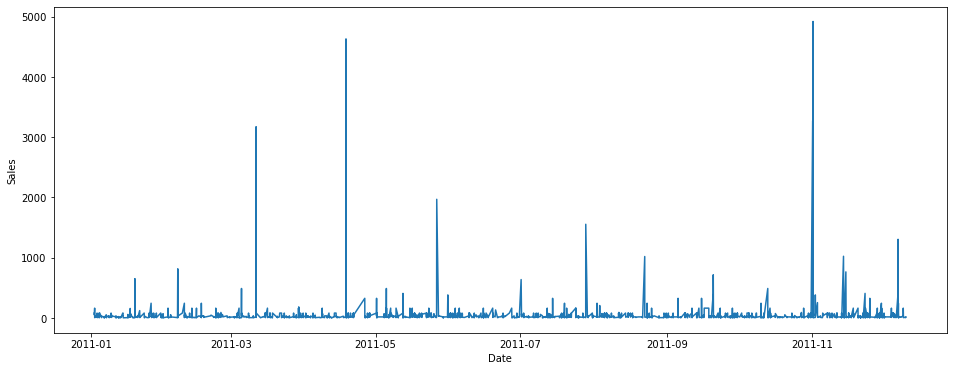

In [31]:
plt.figure(figsize=(16,6))
sns.lineplot(t_light_2011["Date"],t_light_2011["Sales"])

In [32]:
country_specific = data.groupby(["Country"]).sum().reset_index()
country_specific = country_specific.sort_values(["Sales"], ascending = False)
country_specific_10 = country_specific.head(10)
country_specific_10

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Quantity,Price,CustomerID,Sales
28,United Kingdom,4540871,1.845444e+06,5.510928e+09,9.003098e+06
16,Netherlands,200937,6.247730e+03,3.407895e+07,2.854463e+05
6,Germany,119263,3.353214e+04,1.143723e+08,2.288671e+05
5,France,112104,3.699279e+04,1.057630e+08,2.097151e+05
0,Australia,84209,3.612500e+03,1.475853e+07,1.385213e+05
23,Spain,27951,9.504340e+03,3.208028e+07,6.157711e+04
25,Switzerland,30630,6.634360e+03,2.332474e+07,5.708990e+04
3,Belgium,23237,7.372850e+03,2.524670e+07,4.119634e+04
24,Sweden,36083,1.695790e+03,6.637579e+06,3.837833e+04
12,Japan,26016,6.572100e+02,4.095425e+06,3.741637e+04


C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sales (millions)')

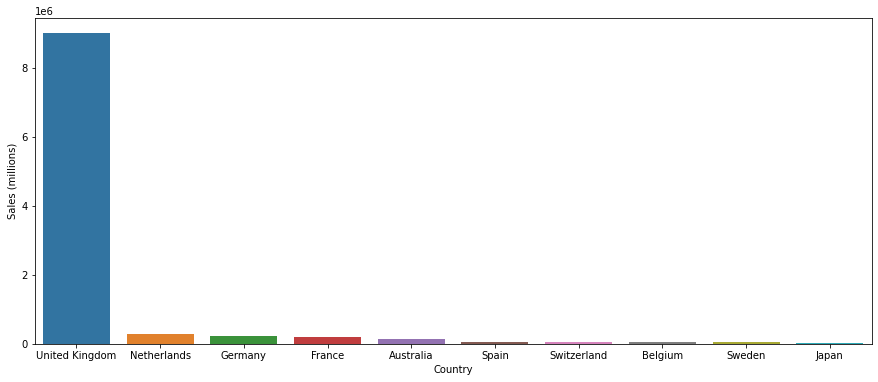

In [33]:
plt.figure(figsize=(15,6))
p = sns.barplot(country_specific_10["Country"], country_specific_10["Sales"])
p.set_ylabel("Sales (millions)")

In [34]:
basket = (data[data['Country'] =="France"].groupby(["BillNo","Itemname"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("BillNo"))
basket

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
570879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
571240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def one_hot_encoding(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket = basket.applymap(one_hot_encoding)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
basket

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
570879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
571240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

In [45]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
rules = rules.sort_values("lift", ascending = False)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
rules

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
79,"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,0.063483,5.977041,0.970454
82,(ALARM CLOCK BAKELIKE RED),"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",0.094388,0.084184,0.071429,0.756757,8.989353,0.063483,3.765023,0.981388
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
81,(ALARM CLOCK BAKELIKE GREEN),"(ALARM CLOCK BAKELIKE RED, POSTAGE)",0.096939,0.086735,0.071429,0.736842,8.495356,0.063021,3.470408,0.976998
...,...,...,...,...,...,...,...,...,...,...
29,(POSTAGE),(MINI PAINT SET VINTAGE),0.765306,0.104592,0.081633,0.106667,1.019837,0.001588,1.002323,0.082880
66,(POSTAGE),(SPACEBOY LUNCH BOX),0.765306,0.125000,0.096939,0.126667,1.013333,0.001276,1.001908,0.056064
67,(SPACEBOY LUNCH BOX),(POSTAGE),0.125000,0.765306,0.096939,0.775510,1.013333,0.001276,1.045455,0.015038
22,(LUNCH BAG SPACEBOY DESIGN),(POSTAGE),0.119898,0.765306,0.091837,0.765957,1.000851,0.000078,1.002783,0.000966


In [49]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
46,(RABBIT NIGHT LIGHT),(POSTAGE),0.188776,0.765306,0.165816,0.878378,1.147748,0.021345,1.929705,0.158684
47,(POSTAGE),(RABBIT NIGHT LIGHT),0.765306,0.188776,0.165816,0.216667,1.147748,0.021345,1.035606,0.548495
53,(RED TOADSTOOL LED NIGHT LIGHT),(POSTAGE),0.181122,0.765306,0.158163,0.873239,1.141033,0.019549,1.851474,0.150940
52,(POSTAGE),(RED TOADSTOOL LED NIGHT LIGHT),0.765306,0.181122,0.158163,0.206667,1.141033,0.019549,1.032199,0.526648
58,(ROUND SNACK BOXES SET OF4 WOODLAND),(POSTAGE),0.158163,0.765306,0.147959,0.935484,1.222366,0.026916,3.637755,0.216092
38,(PLASTERS IN TIN CIRCUS PARADE),(POSTAGE),0.168367,0.765306,0.147959,0.878788,1.148283,0.019107,1.936224,0.155278
59,(POSTAGE),(ROUND SNACK BOXES SET OF4 WOODLAND),0.765306,0.158163,0.147959,0.193333,1.222366,0.026916,1.043599,0.775112
39,(POSTAGE),(PLASTERS IN TIN CIRCUS PARADE),0.765306,0.168367,0.147959,0.193333,1.148283,0.019107,1.030950,0.550225


In [50]:
rules[(rules['lift']>=6) & (rules['confidence']>=0.8)]

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
79,"(ALARM CLOCK BAKELIKE GREEN, POSTAGE)",(ALARM CLOCK BAKELIKE RED),0.084184,0.094388,0.071429,0.848485,8.989353,0.063483,5.977041,0.970454
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
80,"(ALARM CLOCK BAKELIKE RED, POSTAGE)",(ALARM CLOCK BAKELIKE GREEN),0.086735,0.096939,0.071429,0.823529,8.495356,0.063021,5.117347,0.966081
120,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959,0.967949
127,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.084184,0.127551,0.081633,0.969697,7.602424,0.070895,28.790816,0.948294
122,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796,0.956294
129,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.084184,0.137755,0.081633,0.969697,7.039282,0.070036,28.454082,0.936804
77,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
76,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343


## Conclusion

By looking at the rules, it seems as if the green and red alarm clocks are purchased together. Also, red paper cups, napkins and plates are purchased together in a manner that is higher than the overall probability would suggest.